# Исследование объявлений о продаже квартир

## Цели и ход исследования

В данном проекте мы проанализурем объявления с сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цели проекта:**
1. Установить параметры, которые влияют на формирование цены недвижимости. 


2. Проанализировать зависимость цены от этих параметров.

**Ход исследования**

Исследование пройдёт в два этапа:

1. Предобработка данных

    Мы проверим наличие в данных пропусков, дубликатов и аномальных значений. Проанализируем полученные результаты. Удалим, где возможно, пропущенные значения, устраним повторы и аномалии, исправим ошибки.
    
    Проверим и изменим типы данных в соотвествии со значениями.
    
    Категоризируем данные, переведем значения в более удобный формат.
    

2. Исследовательский анализ данных
   
   Мы изучим основные параметры датасета. Визуализируем данные, проанализируем распределение значений.
   
   Проанализируем факторы, которые влияют на стоимость квартир.
   
   Изучим зависимость стоимости квадратного метра от населенного пункта и удаленности от центра Петербурга.

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

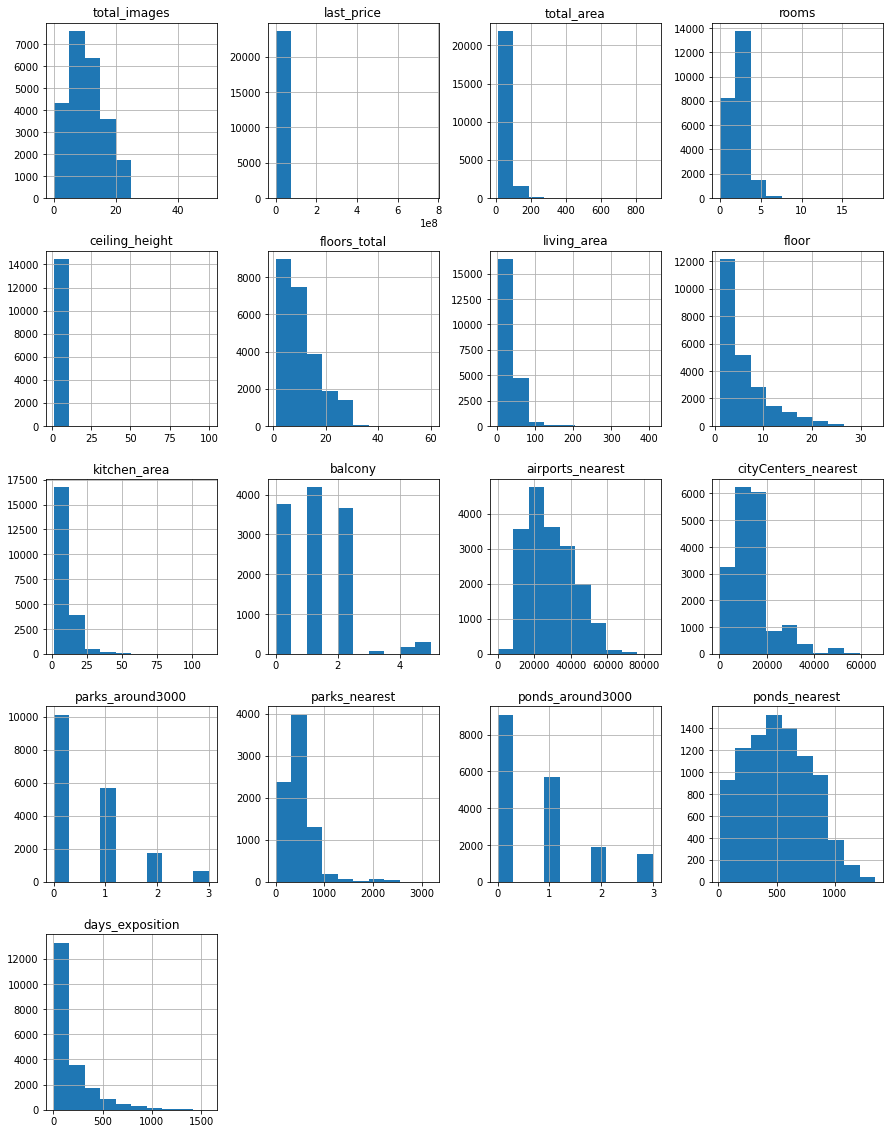

In [5]:
data.hist(figsize=(15, 20));

## Предобработка данных

In [6]:
# Посмотрим, сколько в данных пропущенных значений:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Посчитаем процент пропущенных значений для каждого столбца:
nans = data.isna().sum().reset_index()
nans.columns = ['name', 'nan']
nans['per_cent'] = nans['nan']/len(data)*100
display(nans)

,name,nan,per_cent
0,total_images,0,0.000000
1,last_price,0,0.000000
2,total_area,0,0.000000
3,first_day_exposition,0,0.000000
4,rooms,0,0.000000
5,ceiling_height,9195,38.799105
6,floors_total,86,0.362885
7,living_area,1903,8.029875
8,floor,0,0.000000
9,is_apartment,20924,88.290645


In [8]:
# Посмотрим, есть ли дубликаты:
data.duplicated().sum()

0

In [9]:
# Переименуем столбцы в соответствии со snake_case:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 
data = data.rename(columns={'parks_around3000': 'parks_around_3000'}) 
data = data.rename(columns={'ponds_around3000': 'ponds_around_3000'}) 

### Пропуски

Наибольшее число пропусков обнаружено в столбцах:

is_apartment - 88%

parks_nearest  - 65%

ponds_nearest - 62%

balcony - 48%

ceiling_height - 39%

airports_nearest - 23%

cityCenters_nearest - 23%

parks_around_3000 - 23%

ponds_around_3000 - 23%


#### Пропуски, заменяемые нулями

В столбце 'is_apartment' - является ли апартаментами (то есть видом нежилой коммеческой недвижимости, которая используеся как жилье) пропусков больше всего. Скорее всего, они означают, что квартира не является апартаментами. 

То же самое с 'balcony' - пропуски означают, что балкона нет.

Заменим пропуски в этих столбцах нулями.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(0)

In [11]:
data['balcony'] = data['balcony'].fillna(0)

#### Пропуски картографических данных

airports_nearest - 5542

city_centers_nearest - 5519

parks_around_3000 - 5518

parks_nearest - 15620

ponds_around_3000 - 5518

ponds_nearest - 14589

В столбцах 'parks_around_3000' и 'ponds_around_3000' одинаковое количество пропусков - 5518. А в 'city_centers_nearest' всего на один больше. 

Можно предположить, что в строчках с пропущенными данными в этих столцах, пропущены все картографические данные.

Это может быть связано с техническим сбоем или недоработкой сотрудника, ответственного за сбор этих данных.

In [12]:
len(data[
(data['parks_around_3000'].isna())
& (data['ponds_around_3000'].isna())    
& (data['airports_nearest'].isna()) 
& (data['city_centers_nearest'].isna()) 
& (data['parks_nearest'].isna()) 
& (data['ponds_nearest'].isna())]
)

5518


Посмотрим на пропуски в 'parks_nearest' и 'ponds_nearest', где значения столбцах 'parks_around_3000' и 'ponds_around_3000' не пропущены:


In [13]:
(
data.loc[:, 'airports_nearest': 'ponds_nearest']
[(~data['parks_around_3000'].isna())
& (~data['ponds_around_3000'].isna())    
& (data['parks_nearest'].isna()) 
& (data['ponds_nearest'].isna())]
)

,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
1,12817.0,18603.0,0.0,NaN,0.0,NaN
6,52996.0,19143.0,0.0,NaN,0.0,NaN
7,23982.0,11634.0,0.0,NaN,0.0,NaN
9,50898.0,15008.0,0.0,NaN,0.0,NaN
11,48252.0,51677.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...
23680,26835.0,11878.0,0.0,NaN,0.0,NaN
23684,11827.0,11459.0,0.0,NaN,0.0,NaN
23685,48393.0,51818.0,0.0,NaN,0.0,NaN
23687,40837.0,16704.0,0.0,NaN,0.0,NaN


Значения в 'parks_around_3000' и 'ponds_around_3000'в этом срезе равны 0. А если парка в радиусе 3 км нет, расстояние до ближайшего парка не указывается. То же с прудами.

Оставим осутствующие занчения в картографических данных без изменений. Замена такого большого количества данных на нули и средние значения может сильно исказить картину.

#### Пропуски в данных, заполненных пользователями

У нас остались пропуски в колонках 'ceiling_height', 'living_area', 'kitchen_area', 'floors_total', 'locality_name' и 'days_exposition'.

Первые четыре колонки заполняли сами пользователи. Они могли не знать этих параметров квартир.


In [14]:
data[['living_area','kitchen_area']][(data['living_area'].isna())&(data['kitchen_area'].isna())]

,living_area,kitchen_area
3,NaN,NaN
30,NaN,NaN
37,NaN,NaN
44,NaN,NaN
59,NaN,NaN
...,...,...
23632,NaN,NaN
23642,NaN,NaN
23663,NaN,NaN
23670,NaN,NaN


Большинство пропусков в 'living_area' и в 'kitchen_area' совпадают.

Доля пропущенных значений в этих столбцах составляет менее 10%. Они вряд ли повлияют на результат, поэтому оставим их, чтобы не потерять больше данных.

Удалим строки, с минимальным количеством пропусков в столбцах 'floors_total' и 'locality_name'.

In [15]:
data = data.dropna(subset=['floors_total','locality_name'])

In [16]:
#Еще раз проверим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [17]:
# Заполним пропуски в расстоянии до центра медианным значением по населенным пунктам:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna())\
    & (data['locality_name'] == locality_name), 'city_centers_nearest'] = median

### Аномалии

#### Потолки

В столбце 'ceiling_height' 9084 пропусков, которые могут означать, что заполнявший пользователь не знал высоту потолка.

Помимо этого, в столбце есть аномальные значения.

Некоторые из них, скорее всего, реальные значения, которые просто были не правильно записаны. Их переводим в метры.

Другие неправдоподобно маленькие и большие, сначала меняем на нули.

In [18]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [19]:
# Переводим в метры некорректно заполненные значения:
data.loc[data['ceiling_height'] > 14, 'ceiling_height'] = data['ceiling_height']/10

In [20]:
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

In [21]:
data['ceiling_height'] = data['ceiling_height'].astype('float')

In [22]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] > 1.75, 0) 

In [23]:
data['ceiling_height'].sort_values().unique()

array([ 0.  ,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,
        2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,
        2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,
        2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,
        2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,
        2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,
        2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,
        3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,
        3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,
        3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,
        3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,
        3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,
        3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,
        3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,
        3.67,  3.68,

In [24]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 6.0, 0)

In [25]:
data['ceiling_height'].sort_values().unique()

array([0.  , 2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47,
       2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58,
       2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69,
       2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 ,
       2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91,
       2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02,
       3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13,
       3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25,
       3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36,
       3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48,
       3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59,
       3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76,
       3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93,
       3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.

In [26]:
data['ceiling_height'].value_counts()

0.00    9094
2.50    3522
2.60    1646
2.70    1579
3.00    1108
        ... 
3.88       1
3.39       1
2.25       1
3.84       1
4.65       1
Name: ceiling_height, Length: 169, dtype: int64

У нас оказалось 9093 нулевых знаечния - это пропуски и аномалии, которые мы заменили нулями. Такое большое количество нулевых значений может повлиять на результат, ведь на самом деле, высота потолков не равна 0.

Лучше заменить их средним или медианным. 

К сожалению, у нас нет данных по типу или серии дома, тода бы мы могли разбить данные на категории по этому параметру и рассчитать среднее по каждой категории.

Поэтому просто меняем на среднее ненулевых значений.

In [27]:
data['ceiling_height'] = (
data['ceiling_height']
.where(data['ceiling_height'] != 0, 
data['ceiling_height'][data['ceiling_height'] != 0]
.mean())
)

In [28]:
#Еще раз проверяем уникальные значения в столбце:
data['ceiling_height'].sort_values().unique()

array([2.        , 2.2       , 2.25      , 2.26      , 2.3       ,
       2.34      , 2.4       , 2.45      , 2.46      , 2.47      ,
       2.48      , 2.49      , 2.5       , 2.51      , 2.52      ,
       2.53      , 2.54      , 2.55      , 2.56      , 2.57      ,
       2.58      , 2.59      , 2.6       , 2.61      , 2.62      ,
       2.63      , 2.64      , 2.65      , 2.66      , 2.67      ,
       2.68      , 2.69      , 2.7       , 2.71      , 2.72      ,
       2.72633612, 2.73      , 2.74      , 2.75      , 2.76      ,
       2.77      , 2.78      , 2.79      , 2.8       , 2.81      ,
       2.82      , 2.83      , 2.84      , 2.85      , 2.86      ,
       2.87      , 2.88      , 2.89      , 2.9       , 2.91      ,
       2.92      , 2.93      , 2.94      , 2.95      , 2.96      ,
       2.97      , 2.98      , 2.99      , 3.        , 3.01      ,
       3.02      , 3.03      , 3.04      , 3.05      , 3.06      ,
       3.07      , 3.08      , 3.09      , 3.1       , 3.11   

In [29]:
data['ceiling_height'].value_counts()

2.726336    9094
2.500000    3522
2.600000    1646
2.700000    1579
3.000000    1108
            ... 
3.590000       1
4.900000       1
2.890000       1
2.490000       1
4.650000       1
Name: ceiling_height, Length: 169, dtype: int64

In [30]:
# Снова считаем пропуски, чтобы убедиться, что все изменения внесены:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5432
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Цена

Посмотрим на цены. С такими цифрами неудобно работать. Переведем в миллионы.

In [31]:
data['last_price'].sort_values().unique() 

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [32]:
data['last_price_mln'] = data['last_price']/1000000

In [33]:
data['last_price_mln'] = data['last_price_mln'].round(3)

In [34]:
data['last_price_mln'].sort_values()

8793       0.012
17456      0.430
14911      0.430
16274      0.440
17676      0.450
          ...   
15651    300.000
1436     330.000
14706    401.300
19540    420.000
12971    763.000
Name: last_price_mln, Length: 23565, dtype: float64

In [35]:
# Подозрительно дешевая квартира
data['last_price'].min()

12190.0

Возможно это цена за 1 кв. метр в отдаленной деревне. 

In [36]:
# Посмотрим на все квартиры дешевле полумиллиона:
data[['last_price','locality_name']][data['last_price_mln'] < 0.5]

,last_price,locality_name
5698,450000.0,городской посёлок Будогощь
6859,490000.0,деревня Старополье
8793,12190.0,Санкт-Петербург
9581,450000.0,деревня Старополье
10782,490000.0,Сланцы
14911,430000.0,посёлок станции Свирь
16032,480000.0,Сланцы
16219,450000.0,деревня Вахнова Кара
16274,440000.0,деревня Старополье
17456,430000.0,Сланцы


Нет, это квартира в Санкт-Петербурге в 9 км от центра площадью 109 метров стоит 12 190 рублей. Надо умножать минимум на 1000.

In [37]:
data[data['last_price'] == 12190.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,0,...,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0.012


In [38]:
data['last_price'] = data['last_price'].where(data['last_price'] != 12190.0, data['last_price']*1000)

In [39]:
data['last_price_mln'] = data['last_price_mln'].where(data['last_price_mln'] != 0.012, data['last_price_mln']*1000)

In [40]:
# Проверяем
data['last_price_mln'].sort_values()

17456      0.43
14911      0.43
16274      0.44
16219      0.45
17676      0.45
          ...  
15651    300.00
1436     330.00
14706    401.30
19540    420.00
12971    763.00
Name: last_price_mln, Length: 23565, dtype: float64

#### Общая площадь

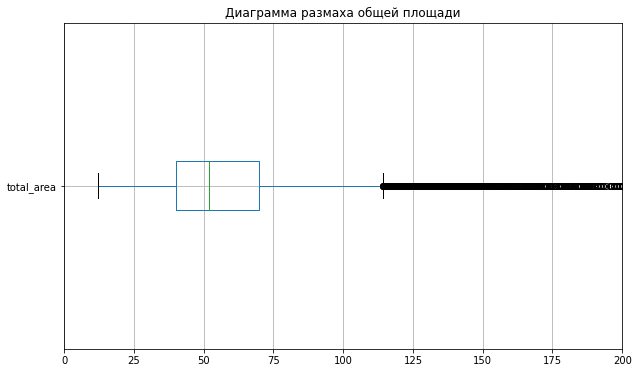

In [41]:
# Построим диаграмму размаха столбца 'total_area'
data['total_area'].plot.box(figsize = (10,6), vert = False, xlim = (0,200), grid = True, title = 'Диаграмма размаха общей площади');

Диаграмма размаха показывает, что медиана находится на уровне 52, а выбросы находятся до 12 и после 114. 

Посмотрим на квартиры меньше 20 и больше 500 м2. Их мало. 

Очень большие квартиры выглядят правдоподобно, в них много комнат и стоят они соотвественно. Их оставляем.

Слишком маленькие квартиры - это, возможно, комнаты, которые случайно попали в раздел квартир. Их удаляем.

In [42]:
data['total_area'][(data['total_area'] < 20) | (data['total_area'] > 500)].value_counts()

18.00     5
13.00     3
19.00     2
15.00     2
17.00     2
18.90     1
618.00    1
17.60     1
15.50     1
17.20     1
19.50     1
17.78     1
16.00     1
14.00     1
507.00    1
517.00    1
18.50     1
590.00    1
631.20    1
18.40     1
13.20     1
12.00     1
18.80     1
631.00    1
900.00    1
Name: total_area, dtype: int64

In [43]:
data[data['total_area'] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.726336,5.0,NaN,5,0,...,0.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,140.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.726336,4.0,332.0,3,0,...,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,50.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.500000,6.0,409.0,3,0,...,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,65.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.450000,7.0,301.5,7,True,...,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,84.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.900000,4.0,322.3,4,0,...,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,140.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.400000,7.0,258.0,5,0,...,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,300.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.800000,25.0,409.7,25,0,...,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,420.0


In [44]:
data[data['total_area'] < 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.700000,9.0,12.00,1,0,...,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,1.500
4542,12,3300000.0,18.00,2018-11-07T00:00:00,1,3.500000,5.0,9.00,2,0,...,0.0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0,3.300
5855,3,945750.0,19.50,2017-09-18T00:00:00,0,2.760000,3.0,12.70,2,False,...,0.0,поселок городского типа Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.946
6084,6,770000.0,18.00,2017-10-16T00:00:00,1,2.726336,5.0,13.00,4,0,...,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.770
8454,7,2250000.0,19.00,2019-03-12T00:00:00,0,3.000000,6.0,NaN,2,0,...,0.0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0,2.250
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.520000,3.0,14.00,3,0,...,0.0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0,2.200
8755,1,1350000.0,18.80,2017-11-22T00:00:00,0,2.750000,19.0,15.80,1,0,...,0.0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0,1.350
8886,10,2450000.0,15.50,2018-08-22T00:00:00,0,2.726336,5.0,10.00,2,0,...,0.0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0,2.450
9157,0,3400000.0,17.60,2018-03-18T00:00:00,1,2.726336,5.0,15.00,2,0,...,0.0,Санкт-Петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0,3.400
9412,5,2100000.0,16.00,2017-12-10T00:00:00,0,2.726336,6.0,13.00,1,0,...,0.0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,2.100


In [45]:
data = data[data['total_area'] > 20]

In [46]:
data['total_area'].describe()

count    23530.000000
mean        60.386697
std         35.644937
min         20.100000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [47]:
data['total_area'][data['total_area'] < 20].value_counts()

Series([], Name: total_area, dtype: int64)

#### Жилая площадь

Проверим на аномалии столбец 'living_area'. 

Минимальный размер жилого помещения по законодательству - 5 м2. Но есть квартиры с жилой площадью 2 и 3 метра. А общая площадь у них от 23 до 139 м. Возможно, в записи просто потерялся ноль. Умножим их на 10.

In [48]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [49]:
data[data['living_area'] <= 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.726336,17.0,3.0,17,0,...,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,4.44
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.000000,6.0,2.0,2,0,...,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,6.35
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.726336,25.0,5.0,8,0,...,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,2.68
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.726336,24.0,2.0,22,0,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,2.33
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.000000,8.0,3.0,8,0,...,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,64.99


In [50]:
data.loc[data['living_area'] < 5, 'living_area'] = data['living_area']*10

In [51]:
data['living_area'].sort_values().unique()

array([  5. ,   5.4,   6. , ..., 409. , 409.7,   nan])

#### Кухня

Проверим кухни. Значения есть совсем маленькие, но и кухни бывают разные. Например в квартирах-студиях. Оставим как есть.

In [52]:
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.89,   3.  ,   3.2 ,   3.3 ,   3.4 ,
         3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,   4.4 ,
         4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,   5.06,
         5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,   5.29,
         5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,   5.47,
         5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,   5.64,
         5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,   5.82,
         5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,   6.1 ,
         6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,   6.26,
         6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,   6.37,
         6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,   6.62,
         6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,   6.82,
         6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,   7.  ,
         7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,   7.17,
      

#### Комнаты

Посмотрим на комнаты. Есть квартиры, где их 0. Это, скорее всего, квартиры-студии или open plan. Заменим эти нули на 1, все-таки комната в квартире должна быть.

In [53]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [54]:
data.loc[:,'total_area':'kitchen_area'][data['rooms'] == 0]

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
144,27.00,2017-03-30T00:00:00,0,2.726336,24.0,15.50,2,0,True,False,NaN
349,25.00,2017-09-27T00:00:00,0,2.726336,14.0,17.00,1,0,False,True,NaN
440,27.11,2018-03-12T00:00:00,0,2.726336,17.0,24.75,4,0,True,False,NaN
508,34.40,2017-03-28T00:00:00,0,2.726336,26.0,24.30,19,0,False,True,NaN
608,25.00,2019-02-20T00:00:00,0,2.726336,10.0,NaN,7,0,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23210,26.00,2017-09-01T00:00:00,0,2.726336,25.0,18.00,16,0,True,False,NaN
23442,27.70,2017-09-28T00:00:00,0,2.726336,24.0,18.00,4,0,False,True,NaN
23554,26.00,2018-09-07T00:00:00,0,2.726336,19.0,NaN,8,0,True,False,NaN
23592,29.00,2017-11-11T00:00:00,0,2.726336,9.0,18.00,8,0,False,True,NaN


In [55]:
data['rooms'] = data['rooms'].where(data['rooms'] !=0, 1)

In [56]:
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

#### Этажи

In [57]:
# С этажами все в порядке, но лучше сменить тип данных на int
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60.])

In [58]:
# Здесь все в порядке
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

#### Период публикации

Есть очень быстрые продажи за 1-3 дня. Оставим эти данные для дальнейшего изучения.

In [59]:
data['days_exposition'].sort_values()

1632     1.0
16053    2.0
16212    2.0
13061    2.0
10974    3.0
        ... 
23684    NaN
23685    NaN
23694    NaN
23696    NaN
23698    NaN
Name: days_exposition, Length: 23530, dtype: float64

### Неявные дубликаты

Явных дубликатов в данных не обнаружено. 

Но в столбце 'locality_name' много скрытых дубликатов: разные варианты написания слова "поселок" с Ё или Е, варианты названия одного и того населенного пункта "поселок городского типа", "городской поселок" или просто "поселок". 


In [60]:
# Посмотрим на уникальные значения
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [61]:
# Посчитаем количество уникальных значений:
data['locality_name'].value_counts()

Санкт-Петербург                     15627
посёлок Мурино                        519
посёлок Шушары                        438
Всеволожск                            397
Пушкин                                368
                                    ...  
поселок Почап                           1
деревня Русско                          1
деревня Пчева                           1
деревня Борисова Грива                  1
садовое товарищество Новая Ропша        1
Name: locality_name, Length: 364, dtype: int64

In [62]:
# Заменим 'поселок' на 'посёлок' во всех названиях:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [63]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [64]:
# Количество уникальных значений уменьшилось на 34:
data['locality_name'].value_counts()

Санкт-Петербург                       15627
посёлок Мурино                          551
посёлок Шушары                          438
Всеволожск                              397
Пушкин                                  368
                                      ...  
коттеджный посёлок Кивеннапа Север        1
деревня Русско                            1
деревня Пчева                             1
деревня Борисова Грива                    1
садовое товарищество Новая Ропша          1
Name: locality_name, Length: 330, dtype: int64

In [65]:
# Заменим 'городской посёлок' на 'посёлок городского типа':
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

In [66]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [67]:
# Еще на 7 уникальных значений меньше:
data['locality_name'].value_counts()

Санкт-Петербург                       15627
посёлок Мурино                          551
посёлок Шушары                          438
Всеволожск                              397
Пушкин                                  368
                                      ...  
деревня Кисельня                          1
коттеджный посёлок Кивеннапа Север        1
посёлок Каложицы                          1
деревня Русско                            1
садовое товарищество Новая Ропша          1
Name: locality_name, Length: 323, dtype: int64

In [68]:
# Посмотрим отдельно на все посёлки:
poselok = data['locality_name'].where(data['locality_name'].str.startswith('посёлок'))
poselok.sort_values().unique()

array(['посёлок Александровская', 'посёлок Алексеевка', 'посёлок Аннино',
       'посёлок Барышево', 'посёлок Белоостров', 'посёлок Бугры',
       'посёлок Возрождение', 'посёлок Войсковицы', 'посёлок Войскорово',
       'посёлок Володарское', 'посёлок Высокоключевой',
       'посёлок Гаврилово', 'посёлок Гарболово', 'посёлок Гладкое',
       'посёлок Глажево', 'посёлок Глебычево', 'посёлок Гончарово',
       'посёлок Громово', 'посёлок Дзержинского', 'посёлок Дружноселье',
       'посёлок Елизаветино', 'посёлок Жилгородок', 'посёлок Жилпосёлок',
       'посёлок Житково', 'посёлок Заводской', 'посёлок Запорожское',
       'посёлок Зимитицы', 'посёлок Ильичёво', 'посёлок Калитино',
       'посёлок Каложицы', 'посёлок Кикерино', 'посёлок Кингисеппский',
       'посёлок Кирпичное', 'посёлок Кобралово', 'посёлок Кобринское',
       'посёлок Коммунары', 'посёлок Коробицыно', 'посёлок Котельский',
       'посёлок Красная Долина', 'посёлок Красносельское',
       'посёлок Левашово', 'посёлок 

In [69]:
# Заменим еще одно название:
data['locality_name'] = data['locality_name'].replace('посёлок Рябово', 'посёлок городского типа Рябово')

In [70]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [71]:
# Осталось 322 уникальных значения (на 42 меньше, чем было):
data['locality_name'].value_counts()

Санкт-Петербург                       15627
посёлок Мурино                          551
посёлок Шушары                          438
Всеволожск                              397
Пушкин                                  368
                                      ...  
деревня Кисельня                          1
коттеджный посёлок Кивеннапа Север        1
посёлок Каложицы                          1
деревня Русско                            1
садовое товарищество Новая Ропша          1
Name: locality_name, Length: 322, dtype: int64

### Типы данных
В двух столбцах тип данных не соотвествует их значениям:

first_day_exposition - object

is_apartment - object

В столбце 'first_day_exposition' меняем тип на datetime.

В столбце 'is_apartment', где есть только два уникальных значения: 0 и True, меняем тип данных на 'bool'.

In [72]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [73]:
data['is_apartment'].unique()

array([0, True], dtype=object)

In [74]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [75]:
data['is_apartment'].value_counts()

False    23480
True        50
Name: is_apartment, dtype: int64

В столбцах 'floors_total' и 'balcony' вещественные числа лучше перевести в целые:

In [76]:
data['floors_total'] = data['floors_total'].astype('int')

In [77]:
data['balcony'] = data['balcony'].astype('int')

In [78]:
data['last_price'] = data['last_price'].round()

In [79]:
data['last_price'] = data['last_price'].astype('int')

In [80]:
# Еще раз проверяем типы данных: 
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
last_price_mln                 float64
dtype: object

**Данные предобработаны**

Мы выполнили предобрабртку данных. Проанализировали количество и процент пропусков. Установили взаимосвязь между пропущенными данными в разных столбцах.

Пропуски в картографических данных наиболее заметны. Их причиной может быть технический сбой, например, при объединении данных из разных источников, или человеческий фактор. Этих пропусков слишком много, чтобы заменить их на нули или средние значения, поэтому мы оставили их без изменений.

Пропуски в данных, которые заполняли пользователи свидетельствуют о не очень старательном заполнении формы. Видимо, некоторые пользователи не хотели утруждаться и искать в документах на квартиру жилую площадь и высоту потолков.

Мы заполнили нулевыми значениями пропуски, которые соответствуют отсутствию признака, например, балкона.
И заполнили средними значениями количественные пропуски в столбце 'ceiling_height'. 
Также мы удалили строки с небольшим количеством пропусков в столбцах 'floors_total' и 'locality_name', так это не повлияет на результаты.

Мы избавились от аномальных занчений. В некоторых случаях, исправив их на нормальные ('ceiling_height','last_price', 'living_area', 'rooms') в соответствии с логикой. В других случаях - удалили ('total_area') или заменили средним значением ('ceiling_height').

Мы обнаружили и убрали неявные дубликаты в названиях населеных пунктов. 

Изменили типы данных в соответствии с занчениями столбцов 'first_day_exposition', 'is_apartment' и  'floors_total'.

Теперь можно переходить к исследовательскому анализу.

## Добавление в таблицу новых столбцов

In [81]:
# Добавим столбец с ценой одного квадратного метра
data['price_per_meter'] = data['last_price']/data['total_area']

In [82]:
# Добавим столбец с днем недели публикации объявления 
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday 

In [83]:
# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

In [84]:
# Добавим столбец с годом публикации объявления
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year 

In [85]:
# Категоризируем значения столбца 'floor' по типам этажей：«первый», «последний», «другой»
def categorize_floor(row):
        if row ['floor'] == 1 and row ['floor'] != row['floors_total']:
            return 'первый'
        elif row ['floor'] != 1 and row ['floor'] == row['floors_total']:
            return 'последний'
        elif row ['floor'] != 1 and row ['floor'] != row['floors_total']:
            return 'другой'
        else:
            return 'одноэтажный'

In [86]:
# Добавим столбец с типом этажа квартиры
data['floor_type'] = data.apply(categorize_floor, axis=1)

In [87]:
# Добавим столбец расстоянием до центра города в километрах
data['city_centers_nearest_km'] = data['city_centers_nearest'][data['city_centers_nearest'] != 'Unknown']/1000

In [88]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()

In [89]:
data[['city_centers_nearest','city_centers_nearest_km']]

,city_centers_nearest,city_centers_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0
...,...,...
23694,4232.0,4.0
23695,NaN,NaN
23696,NaN,NaN
23697,10364.0,10.0


In [90]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln,price_per_meter,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.00,8,False,...,2.0,755.0,NaN,13.000,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.726336,11,18.60,1,False,...,0.0,NaN,81.0,3.350,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.726336,5,34.30,4,False,...,2.0,574.0,558.0,5.196,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.726336,14,NaN,9,False,...,3.0,234.0,424.0,64.900,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.00,13,False,...,1.0,48.0,121.0,10.000,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.726336,12,14.40,5,False,...,NaN,NaN,55.0,2.890,95065.789474,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.726336,26,10.60,6,False,...,0.0,NaN,155.0,3.700,99195.710456,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.726336,24,NaN,22,False,...,0.0,NaN,NaN,7.915,110544.692737,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.726336,27,15.43,26,False,...,NaN,NaN,189.0,2.900,87454.764777,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.60,7,False,...,0.0,NaN,289.0,5.400,88524.590164,6,2,2017,другой,15.0


## Исследовательский анализ данных

### Гистограммы

Построим гистограммы для основных параметров:

#### Общая площадь

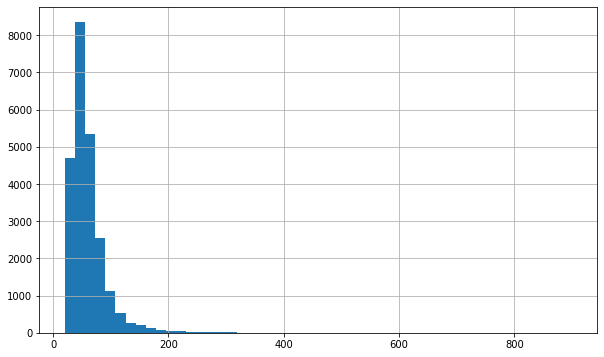

In [91]:
data['total_area'].hist(bins = 50, figsize = (10,6));

In [92]:
len(data.query('total_area > 200')) / len(data)*100

0.9604759881002974

Квартир площадью больше 200 м2 очень мало - меньше 1%.

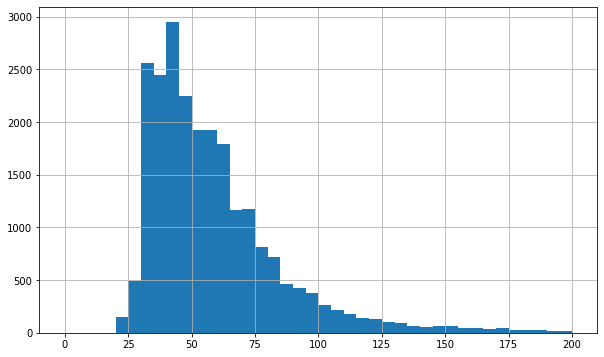

In [93]:
data['total_area'].hist(bins = 40,  range = (0,200), figsize = (10,6));

In [94]:
len(data.query('30 <= total_area <= 60')) / len(data)*100

61.18997025074373

Основная масса квартир - 63% - имеет площадь от 30 до 60 м2. Больше всего квартир площадью около 40м2.

#### Жилая площадь

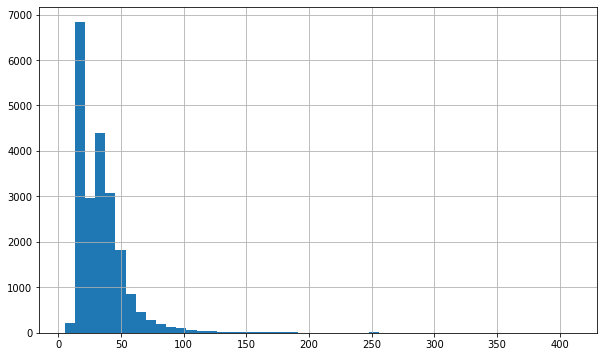

In [95]:
data['living_area'].hist(bins = 50, figsize = (10,6));

Квартир с жилой площадью больше 200 м2 еще меньше.

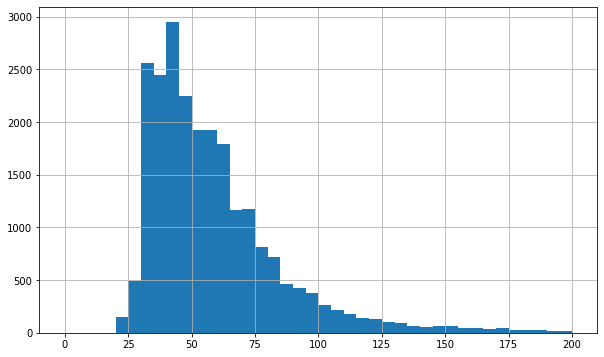

In [96]:
data['total_area'].hist(bins = 40,  range = (0,200), figsize = (10,6));

Здесь те же пики в районе 30 и 40 м2, что и гистограмме общей площади.

#### Кухня

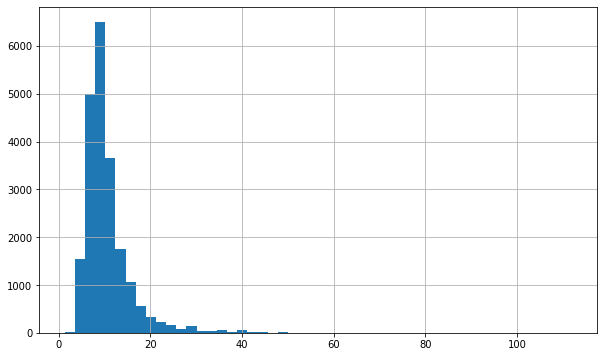

In [97]:
data['kitchen_area'].hist(bins = 50, figsize = (10,6));

Кухонь больше 40 м2 почти нет.

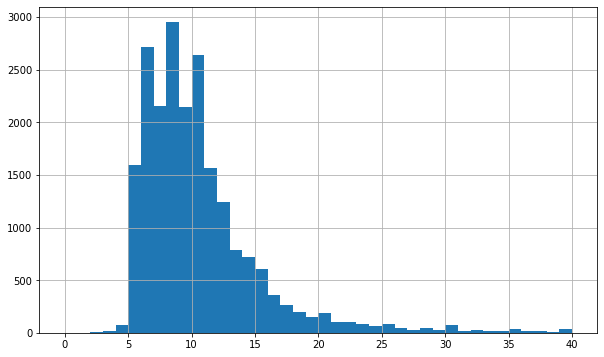

In [98]:
data['kitchen_area'].hist(bins = 40,  range = (0,40), figsize = (10,6));

In [99]:
len(data.query('5 <= kitchen_area <= 12')) / len(data)*100

69.78325541861453

Самая распространенная площадь кухни - от 5 до 12 м2.

#### Цена

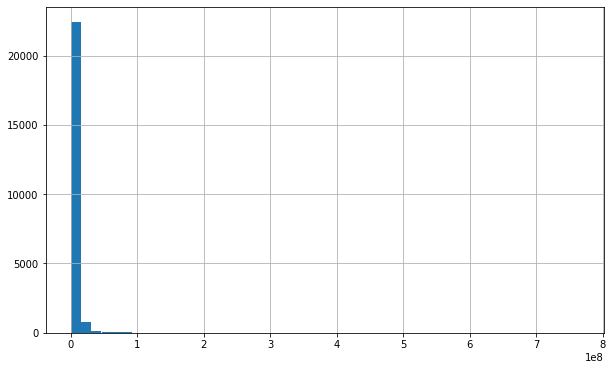

In [100]:
data['last_price'].hist(bins = 50, figsize = (10,6));

Этот график выглядит не очень информативно. Посмотрим на данные в миллионах рублей.

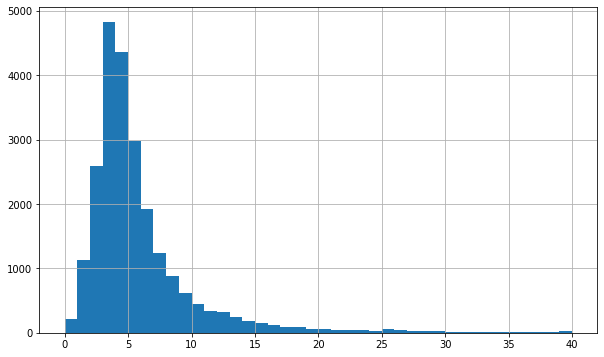

In [101]:
data['last_price_mln'].hist(bins = 40, range = (0,40), figsize = (10,6));

In [102]:
len(data.query('2 <= last_price_mln <= 6')) / len(data)*100

63.34891627709307

Самая распространенная цена - около 3 млн. Основная масса квартир стоит от 2 до 6 млн.

#### Количество комнат

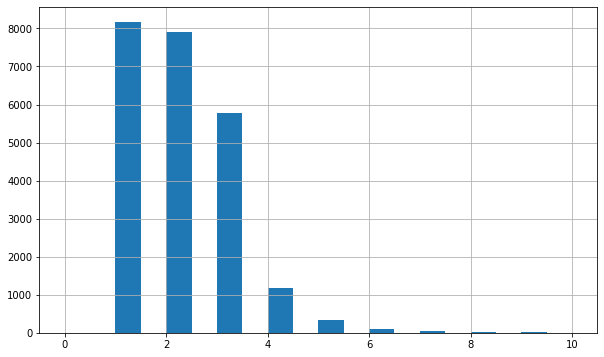

In [103]:
data['rooms'].hist(bins = 20, range = (0,10), figsize = (10,6));

Чаще всего продают однокомнатные и двухкомнатные квартиры. Квартир больше 5 комнат очень мало.

#### Потолки

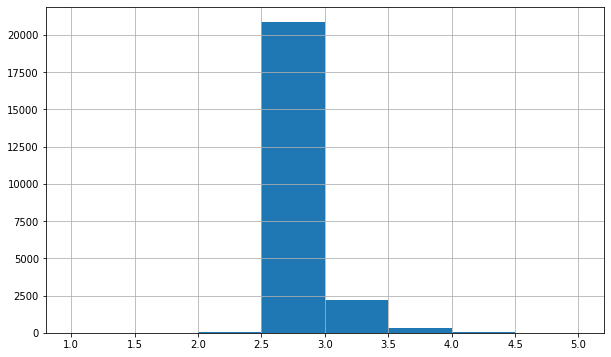

In [104]:
data['ceiling_height'].hist(bins = 8, range = (1,5), figsize = (10,6));

В высоте потолков большого разнообразия нет. С учетом того, что мы заполнили пропуски средними значениями, как и следовало ожидать подавляющее число потолков оказались средней высоты - около 2,5 м. 

#### Этажи

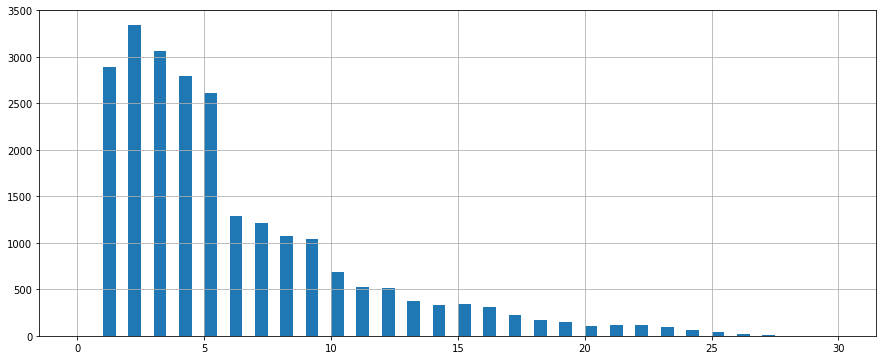

In [105]:
data['floor'].hist(bins = 60, range = (0,30), figsize = (15,6));

Больше всего квартир расположены на 1 - 5 этажах.

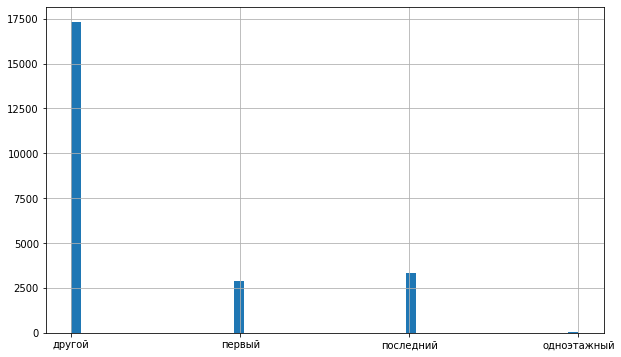

In [106]:
data['floor_type'].hist(bins = 50, figsize = (10,6));

На этом графике первый этаж проигрывает остальным. Больше всего квартир расположены не на первом и не на последнем этажах.

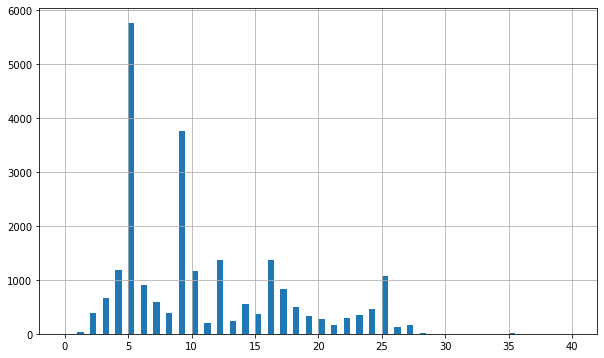

In [107]:
data['floors_total'].hist(bins = 80, range = (0, 40), figsize = (10,6));

Больше всего квартир - в пятиэтажках. На втором месе девятиэтажные дома.

#### Расстояние от центра

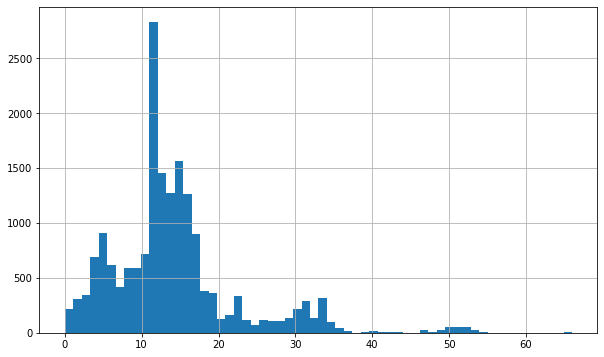

In [108]:
data['city_centers_nearest_km'].hist(bins = 60, figsize = (10,6));

Большинство квартир расположены в 10 - 20 км от центра.

#### Расстояние от аэропорта

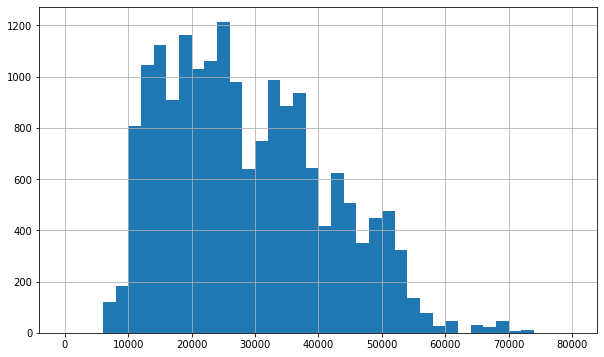

In [109]:
data['airports_nearest'].hist(bins = 40, range = (0, 80000), figsize = (10,6));

И в 10-40 км от аэропорта.

#### Месяц публикации

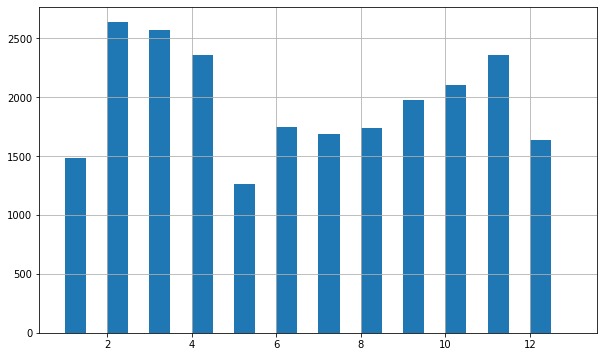

In [110]:
data['exposition_month'].hist(bins = 24, range = (1,13), figsize = (10,6));

Чаще всего объявления о продаже квартир размещают с февраля по апрель. Реже всего в мае.

#### День публикации

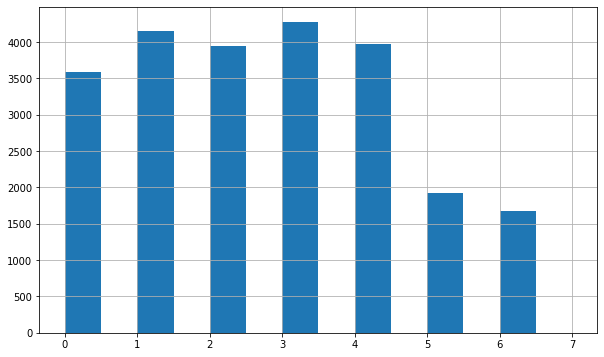

In [111]:
data['exposition_weekday'].hist(bins = 14, range = (0,7), figsize = (10,6));

Объявления публикуют в основном в будние дни. На выходных - в два раза реже.

#### Количество дней публикации

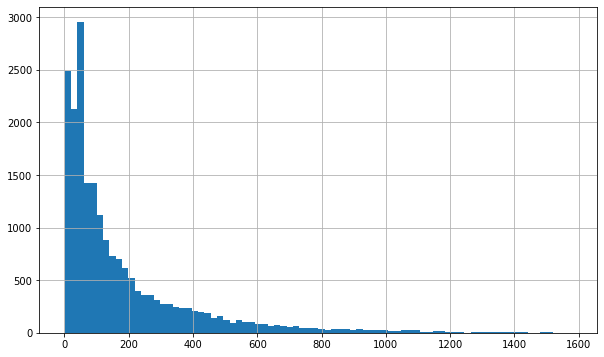

In [112]:
data['days_exposition'].hist(bins = 80, figsize = (10,6));

Продаж дольше 1200 дней крайне мало.

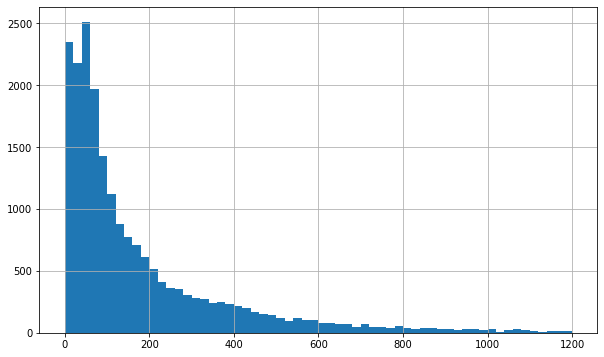

In [113]:
data['days_exposition'].hist(bins = 60, range = (0,1200), figsize = (10,6));

Максимальное число продаж  - до 200 дней.

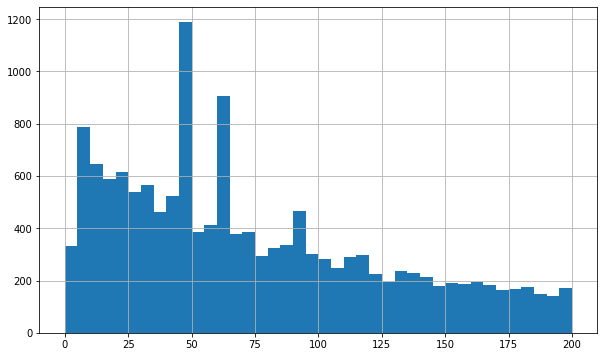

In [114]:
data['days_exposition'].hist(bins = 40, range = (0,200), figsize = (10,6));

Чаще всего квартиры продают за 1,5 - 2 месяца. 

Также есть пик в районе 5 дней. Такие продажи подозрительно быстрые. Возможно объявления, которые висели всего несколько дней, снимались с публикации по другой причине. Продавец передумал или нарушил правла Яндекс.Недвижимости, и его объявление сняли.

Также есть слишком долгие продажи -  более 2-3 лет. Часть из них может говорить о том, что продавец передумал продавать или уже продал, но забыл снять объявление. 

Возможно слишком короткие и длинные продажи искажают картину. 

Среднее почти в два раза больше медианы:

In [115]:
data['days_exposition'].describe()

count    20359.000000
mean       180.883540
std        219.778881
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [116]:
#Уберем слишком короткие и слишком длинные продажи.
data.query('7 < days_exposition < 1000')['days_exposition'].describe()

count    19243.000000
mean       174.401185
std        188.374148
min          8.000000
25%         45.000000
50%        100.000000
75%        232.000000
max        999.000000
Name: days_exposition, dtype: float64

Разница между средним и медианой немного сократилась.

### Зависимость цены  от других параметров

#### Цена и площадь

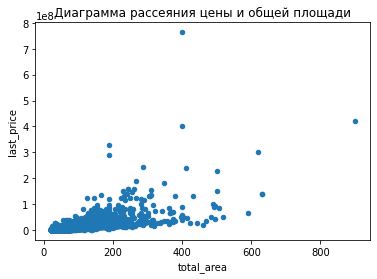

In [117]:
data.plot(x='total_area', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и общей площади'); 

In [118]:
data['last_price'].corr(data['total_area'])

0.6537351435480094

На диаграмме рассеяния видно, что существует взаимосвязь между ценой и площадью, хотя и не очень явная. 

Корреляция 0.65 говорит о наличии положительной связи между общей площадью квартиры и ее ценой.

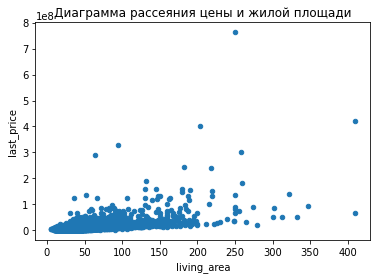

In [119]:
data.plot(x='living_area', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и жилой площади');  

In [120]:
data['last_price'].corr(data['living_area'])

0.5666675938352365

Жилая площадь влияет на цену чуть меньше.

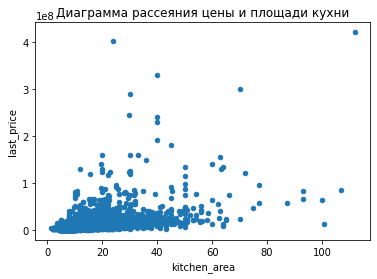

In [121]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и площади кухни'); 

In [122]:
data['last_price'].corr(data['kitchen_area'])

0.52061964274907

А площадь кухни еще меньше.

#### Цена и количество комнат

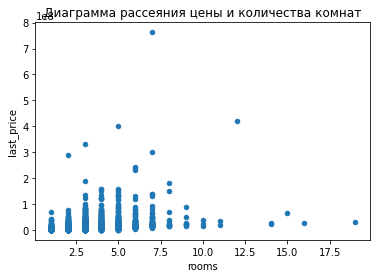

In [123]:
data.plot(x='rooms', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и количества комнат'); 

In [124]:
data.pivot_table(index = 'rooms', values ='last_price_mln', aggfunc = ['count', 'mean'])

,count,mean
,last_price_mln,last_price_mln
rooms,,
1,8164,3.830023
2,7896,5.589102
3,5779,8.174765
4,1172,13.417917
5,325,23.798305
6,104,31.880038
7,59,51.470068
8,12,50.224167


In [125]:
data['last_price'].corr(data['rooms'])

0.3647472608049673

На графике видно что цена растет с увеличением количества комнат, но только до 7 комнат, а дальше цены разнятся, но в целом падают. Это подтверждаем и сводная таблица. Вероятно квартиры свыше 7 комнат не пользуются спросом.

Корреляция между ценой и количеством комнат слабая.

#### Цена и этаж

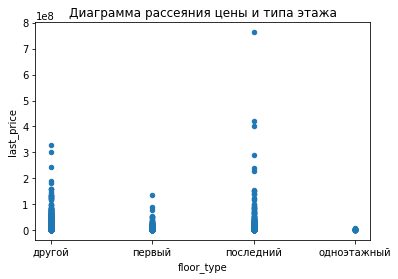

In [126]:
data.plot(x='floor_type', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и типа этажа');

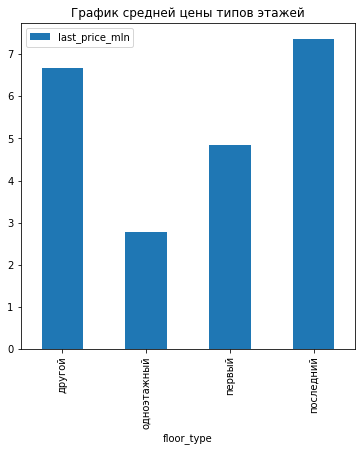

In [127]:
# Посмотрим по среднему 
data.pivot_table(index = 'floor_type', values ='last_price_mln', aggfunc = 'mean')\
.plot(kind = 'bar',figsize = (6,6), title = 'График средней цены типов этажей');

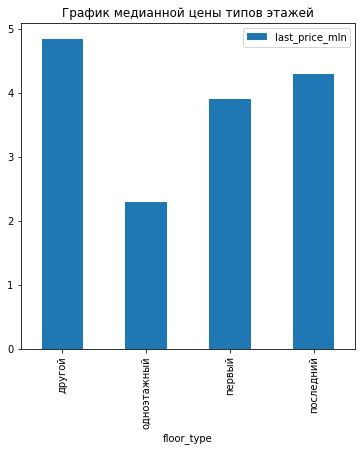

In [128]:
# И по медиане
data.pivot_table(index = 'floor_type', values ='last_price_mln', aggfunc = 'median')\
.plot(kind = 'bar',figsize = (6,6), title = 'График медианной цены типов этажей');

In [129]:
data.pivot_table(index = 'floor_type', values ='last_price_mln', aggfunc = ['count', 'mean', 'median'])

,count,mean,median
,last_price_mln,last_price_mln,last_price_mln
floor_type,,,
другой,17310,6.678450,4.85
одноэтажный,25,2.788200,2.30
первый,2868,4.836806,3.90
последний,3327,7.367904,4.30


Если смотреть на среднее, последний этаж стоит дороже остальных. Но по медиане - дороже "другой". Медианное значение дает более точный результат, когда в данных есть значения, которые сильно выделяются из большинства.

#### Цена и день публикации

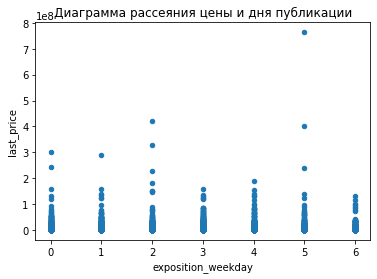

In [130]:
data.plot(x='exposition_weekday', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и дня публикации');

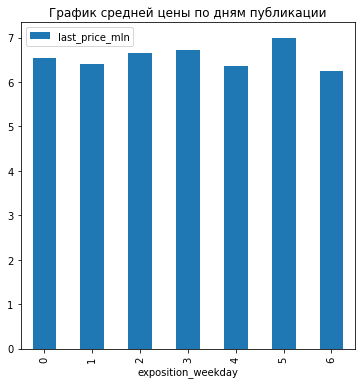

In [131]:
data.pivot_table(index = 'exposition_weekday', values ='last_price_mln', aggfunc = 'mean')\
.plot(kind = 'bar',figsize = (6,6), title = 'График средней цены по дням публикации');

In [132]:
data.pivot_table(index = 'exposition_weekday', values ='last_price_mln', aggfunc = ['count', 'mean'])

,count,mean
,last_price_mln,last_price_mln
exposition_weekday,,
0,3589,6.527604
1,4158,6.394571
2,3939,6.643373
3,4273,6.710367
4,3977,6.362905
5,1917,6.991314
6,1677,6.257116


In [133]:
data['last_price'].corr(data['exposition_weekday'])

0.0013348419684017668

Дороже всех стоят квартиры в объявлениях, размещенных в субботу. Хотя разница в средней цене между днями публикации очень незначительная. 

Корреляция почти нулевая.

#### Цена и месяц публикации

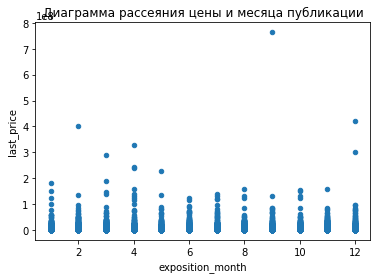

In [135]:
data.plot(x='exposition_month', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены и месяца публикации');

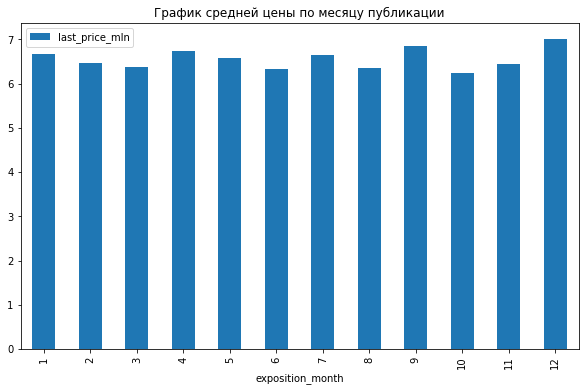

In [136]:
data.pivot_table(index = 'exposition_month', values ='last_price_mln', aggfunc = 'mean')\
.plot(kind = 'bar',figsize = (10,6), title = 'График средней цены по месяцу публикации');

In [137]:
data.pivot_table(index = 'exposition_month', values ='last_price_mln', aggfunc = ['count', 'mean'])

,count,mean
,last_price_mln,last_price_mln
exposition_month,,
1,1484,6.674173
2,2635,6.465710
3,2569,6.374494
4,2354,6.747045
5,1261,6.591126
6,1744,6.324138
7,1683,6.646921
8,1734,6.358403


In [138]:
data['last_price'].corr(data['exposition_month'])

0.002786432978724217

Объявления о самых дорогих кварирах размещают в декабре. Но и здесь разница невелика, а корреляция стремится к нулю.

#### Цена и год публикации

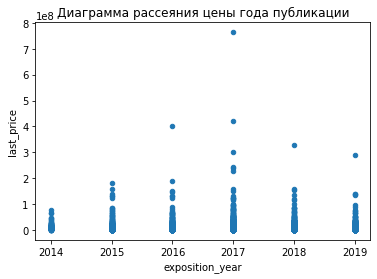

In [140]:
data.plot(x='exposition_year', y='last_price', kind='scatter', title = 'Диаграмма рассеяния цены года публикации');

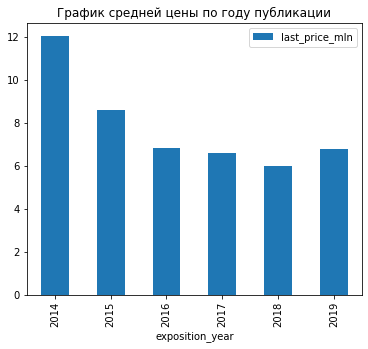

In [142]:
data.pivot_table(index = 'exposition_year', values ='last_price_mln', aggfunc = 'mean')\
.plot(kind = 'bar',figsize = (6,5), title = 'График средней цены по году публикации');

In [143]:
year_price_pivot = data.pivot_table(index = 'exposition_year', values ='last_price_mln', aggfunc = ['count', 'mean','median'])
year_price_pivot.columns = ['count', 'price_mean', 'price_median']

In [144]:
year_price_pivot

,count,price_mean,price_median
exposition_year,,,
2014,136,12.046603,7.6400
2015,1164,8.607052,5.3125
2016,2743,6.832328,4.5500
2017,8150,6.589155,4.5000
2018,8470,5.961232,4.5800
2019,2867,6.790156,5.0500


In [145]:
data['last_price'].corr(data['exposition_year'])

-0.04274570354253146

Данные на графиках расходятся. 

Самые дорогие квартиры выставили на продажу в 2017 году. 

Но самая высокая средняя цена на квартиры была в 2014. В тот год объвлений было размещено очень мало. 

Максимальное количество объявлений было размещено в 2018 году, но средняя цена там самая низкая. 

А медианая цена ниже всего в 2017.

Корреляция очень низкая и при этом отрицательная.

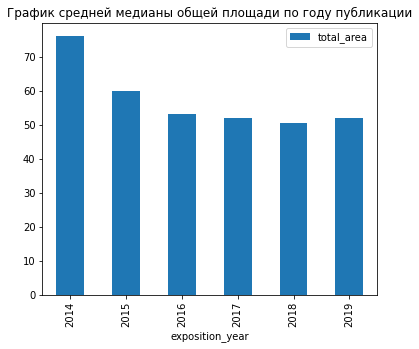

In [146]:
# Посмотрим динамику площади продаваемых квартир
year_area_pivot = data.pivot_table(index = 'exposition_year', values ='total_area', aggfunc = 'median')
year_area_pivot.plot(kind = 'bar',figsize = (6,5), title = 'График средней медианы общей площади по году публикации');

In [147]:
year_price_area = year_price_pivot.merge(year_area_pivot, on='exposition_year').reset_index()

In [148]:
year_price_area

,exposition_year,count,price_mean,price_median,total_area
0,2014,136,12.046603,7.6400,76.18
1,2015,1164,8.607052,5.3125,60.00
2,2016,2743,6.832328,4.5500,53.10
3,2017,8150,6.589155,4.5000,52.00
4,2018,8470,5.961232,4.5800,50.50
5,2019,2867,6.790156,5.0500,52.00


Действительно цена падает одновременно с уменьшением площади продаваемых квартир.

#### Цена и населенный пункт

Посчитаем цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [149]:
locality_pivot = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ['count', 'median'])
locality_pivot.columns = ['count','price_median']
locality_pivot.sort_values(by = 'count', ascending = False).head(10)

,count,price_median
locality_name,,
Санкт-Петербург,15627,104761.904762
посёлок Мурино,551,86042.638623
посёлок Шушары,438,76747.967480
Всеволожск,397,65789.473684
Пушкин,368,99993.589744
Колпино,338,74723.748474
посёлок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,298,91930.232558


В лидерах по количеству объявлений, как и ожидалось, Санкт-Петербург. Остальные населенные пункты отстают в десятки раз.

Выделим населённые пункты с самой высокой стоимостью квадратного метра:

In [150]:
locality_pivot.sort_values(by = 'price_median', ascending = False).head(10)

,count,price_median
locality_name,,
Санкт-Петербург,15627,104761.904762
Зеленогорск,24,101666.666667
Кудрово,171,100000.000000
Пушкин,368,99993.589744
Сестрорецк,183,99678.456592
посёлок Левашово,1,96997.690531
деревня Кудрово,298,91930.232558
посёлок Парголово,327,91642.857143
Мурино,34,91478.394974


В десятку лидеров вошли элитые города и поселки Курортного райна: Зеленогорск, Репино, Сестрорецк, сам Санкт-Петербург, а также ближайшие к городу территории Ленобласти с массовой жилой застройкой  - Кудрово и Мурино.

Выделим населённые пункты с самой низкой стоимостью квадратного метра:

In [151]:
locality_pivot.sort_values(by = 'price_median').head(10)

,count,price_median
locality_name,,
деревня Старополье,3,11000.000000
посёлок станции Свирь,2,11481.481481
деревня Вахнова Кара,1,11688.311688
деревня Выскатка,2,12335.480902
посёлок Совхозный,2,12629.129129
деревня Малая Романовка,1,12724.550898
посёлок Тёсово-4,1,12931.034483
деревня Сижно,1,13709.677419
деревня Ям-Тесово,2,13711.553373


В список попали отдаленные деревни и поселки Ленинградской области.

#### Средняя цена каждого километра от центра

In [152]:
price_per_km =( 
data.query('locality_name == "Санкт-Петербург"')
.pivot_table(index = 'city_centers_nearest_km', values = 'price_per_meter')
.reset_index())
price_per_km.columns = ['km','price_mean']

In [153]:
price_per_km

,km,price_mean
0,0.0,245833.530289
1,1.0,176277.529376
2,2.0,157820.650824
3,3.0,121514.338306
4,4.0,133290.961518
5,5.0,140377.788312
6,6.0,151075.803812
7,7.0,156281.981833
8,8.0,125667.248323
9,9.0,113334.315238


Самые отдаленные квартиры находятся в 29 км от центра и стоят в среднем 73 тыс. руб. за м2. Средняя стоимость квадратного метра непосредственно в центре  - 246 тыс. руб. Разница более чем в 3 раза.

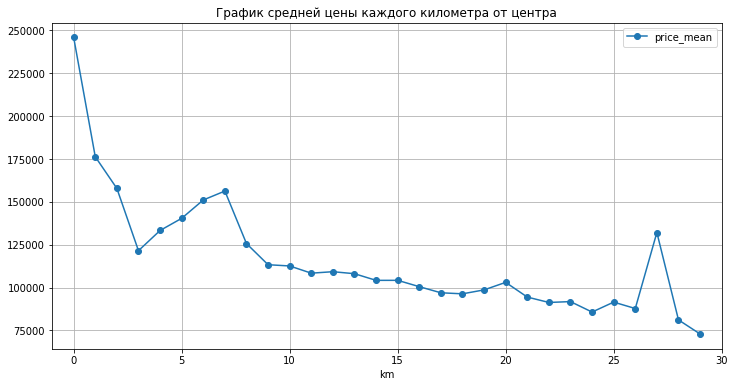

In [154]:
price_per_km.plot(x='km', 
                  y='price_mean', 
                  style='o-', 
                  xlim=(-1, 30), 
                  grid=True, 
                  figsize=(12, 6), 
                  title = 'График средней цены каждого километра от центра');

In [155]:
# Напоследок посмотрим все корреляции цены с другими параметрами:
data_corr = data.corr()
data_corr['last_price']

total_images               0.104590
last_price                 1.000000
total_area                 0.653735
rooms                      0.364747
ceiling_height             0.292708
floors_total              -0.006931
living_area                0.566668
floor                      0.026664
is_apartment               0.026954
studio                    -0.023917
open_plan                 -0.008327
kitchen_area               0.520620
balcony                    0.008216
airports_nearest          -0.026460
city_centers_nearest      -0.206261
parks_around_3000          0.151711
parks_nearest             -0.016619
ponds_around_3000          0.160987
ponds_nearest             -0.085952
days_exposition            0.080631
last_price_mln             1.000000
price_per_meter            0.737610
exposition_weekday         0.001335
exposition_month           0.002786
exposition_year           -0.042746
city_centers_nearest_km   -0.206581
Name: last_price, dtype: float64

## Общий вывод
1. Мы провели предобработку данных.
    
    Проверили наличие в данных пропусков, дубликатов и аномальных значений.
    
    Проанализировали полученные результаты. Удалили, где возможно, пропущенные значения, устранили повторы и аномалии, исправили ошибки.
    
    Проверили и изменили типы данных в соотвествии со значениями.
    
    Категоризирвали данные, перевели значения в более удобный формат.
    

2. Мы изучили основные параметры датасета. Визуализировали данные с помощью гистрограмм, проанализировали распределение значений.

   Большая часть продаваемых на Яндекс.Невижимость квартир - 63% - имеют общую и жилую площадь в пределах от 30 до 60 м2 и площадь кухни от 5 до 12 м2.
   
   Стоимость квартир чаще всего состаляет от 2 до 6 млн рублей.
   
   Больше всего продают однокомнатные и двухкомнатные квартиры, не на первом и не на последнем этажах. Больше всего квартир - в пятиэтажных и девятиэтажных домах.
   
   Большинство квартир расположены в 10 - 20 км от центра и в 10-40 км от аэропорта.
   
   Чаще всего объявления о продаже квартир размещают с февраля по апрель. Объявления публикуют в основном в будние дни. 
   
   Чаще всего квартиры продают за 1,5 - 2 месяца.
 
   Мы выявили подозрительно быстрые продажи, которые составляют меньше недели. Возможно объявления, которые висели всего несколько дней, снимались с публикации из-за того, что продавец передумал или нарушил правила Яндекс.Недвижимости.
   Также есть слишком долгие продажи - более двух - трех лет. Возможно, в этих случаях продавец передумал или уже продал, но забыл снять объявление.
   

3. Мы проанализировали факторы, которые влияют на стоимость квартиры с помощью диаграмм рассеивания, столбчатых графиков, сводных таблиц и подсчета коэффициента корреляции Пирсона.

    Наиболее существенную взаимосвязь мы выявили между ценой и близостью к центру города, а также ценой и общей площадью квартиры. 
    
    Остальные факторы влияют на цену незначительно. 
    
    Хотя мы установили, что цена растет с увеличением количества комнат до 7. Вероятно, квартиры больше 7 комнат не пользуются спросом.
    
    Не первый и не последний этажи стоят дороже.
    
    Дороже квартиры в объявлениях, размещенных в субботу, и в декабре. 
    
    Самые дорогие квартиры выставили на продажу в 2017 году. Но самая высокая средняя цена на квартиры была в 2014. Хотя в тот год объвлений было размещено очень мало. Максимальное количество объявлений было размещено в 2018 году, а средняя цена там самая низкая, но средняя цена там самая низкая. А медианая цена ниже всего в 2017. Мы проанализировли динамику цены и площади по годам и выявили, что цена падала на фоне уменьшения площади продаваемых квартир.
    

4. Мы рассчитали среднюю стоимость квадратного метра в разных населенных пунктах с помощью сводных таблиц.

    Мы выделии 10 населенных пунктов с наибольшим количеством объвлений. Лидер, как и ожидалось, Санкт-Петербург. В остальных населенных пунктах продают в десятки раз меньше квартир.
    
    Мы выявили десять населенных пунктов с самыми дорогими и самыми дешевыми квартирами по цене за квадратный метр.
    
    В десятку лидеров вошли элитые города и поселки Курортного райна: Зеленогорск, Репино, Сестрорецк, сам Санкт-Петербург, а также ближайшие к городу территории Ленобласти с массовой жилой застройкой - Кудрово и Мурино.
    
    В список самых дешевых по цене за м2 попали отдаленные деревни и поселки Ленинградской области.
    

5. Мы также рассчитали среднюю цену каждого километра от центра Петербурга. 

    Самые отдаленные от центра квартиры в Санкт-Петербурге стоят в среднем 73 тыс. руб. за м2. Средняя стоимость квадратного метра непосредственно в центре - 246 тыс. руб. Таким образом, цена квадратного метра в центре в три с лишним раза больше, чем в 30 км от него.